In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('/home/scratch/BWEART2/tor_RF_event_values_shorts.csv')


train, temp = train_test_split(df, test_size=.30, random_state=1995995)
val, test = train_test_split(temp, test_size=.66, random_state=1995995)
train.to_csv('train.csv')
val.to_csv('val.csv')
test.to_csv('test.csv')

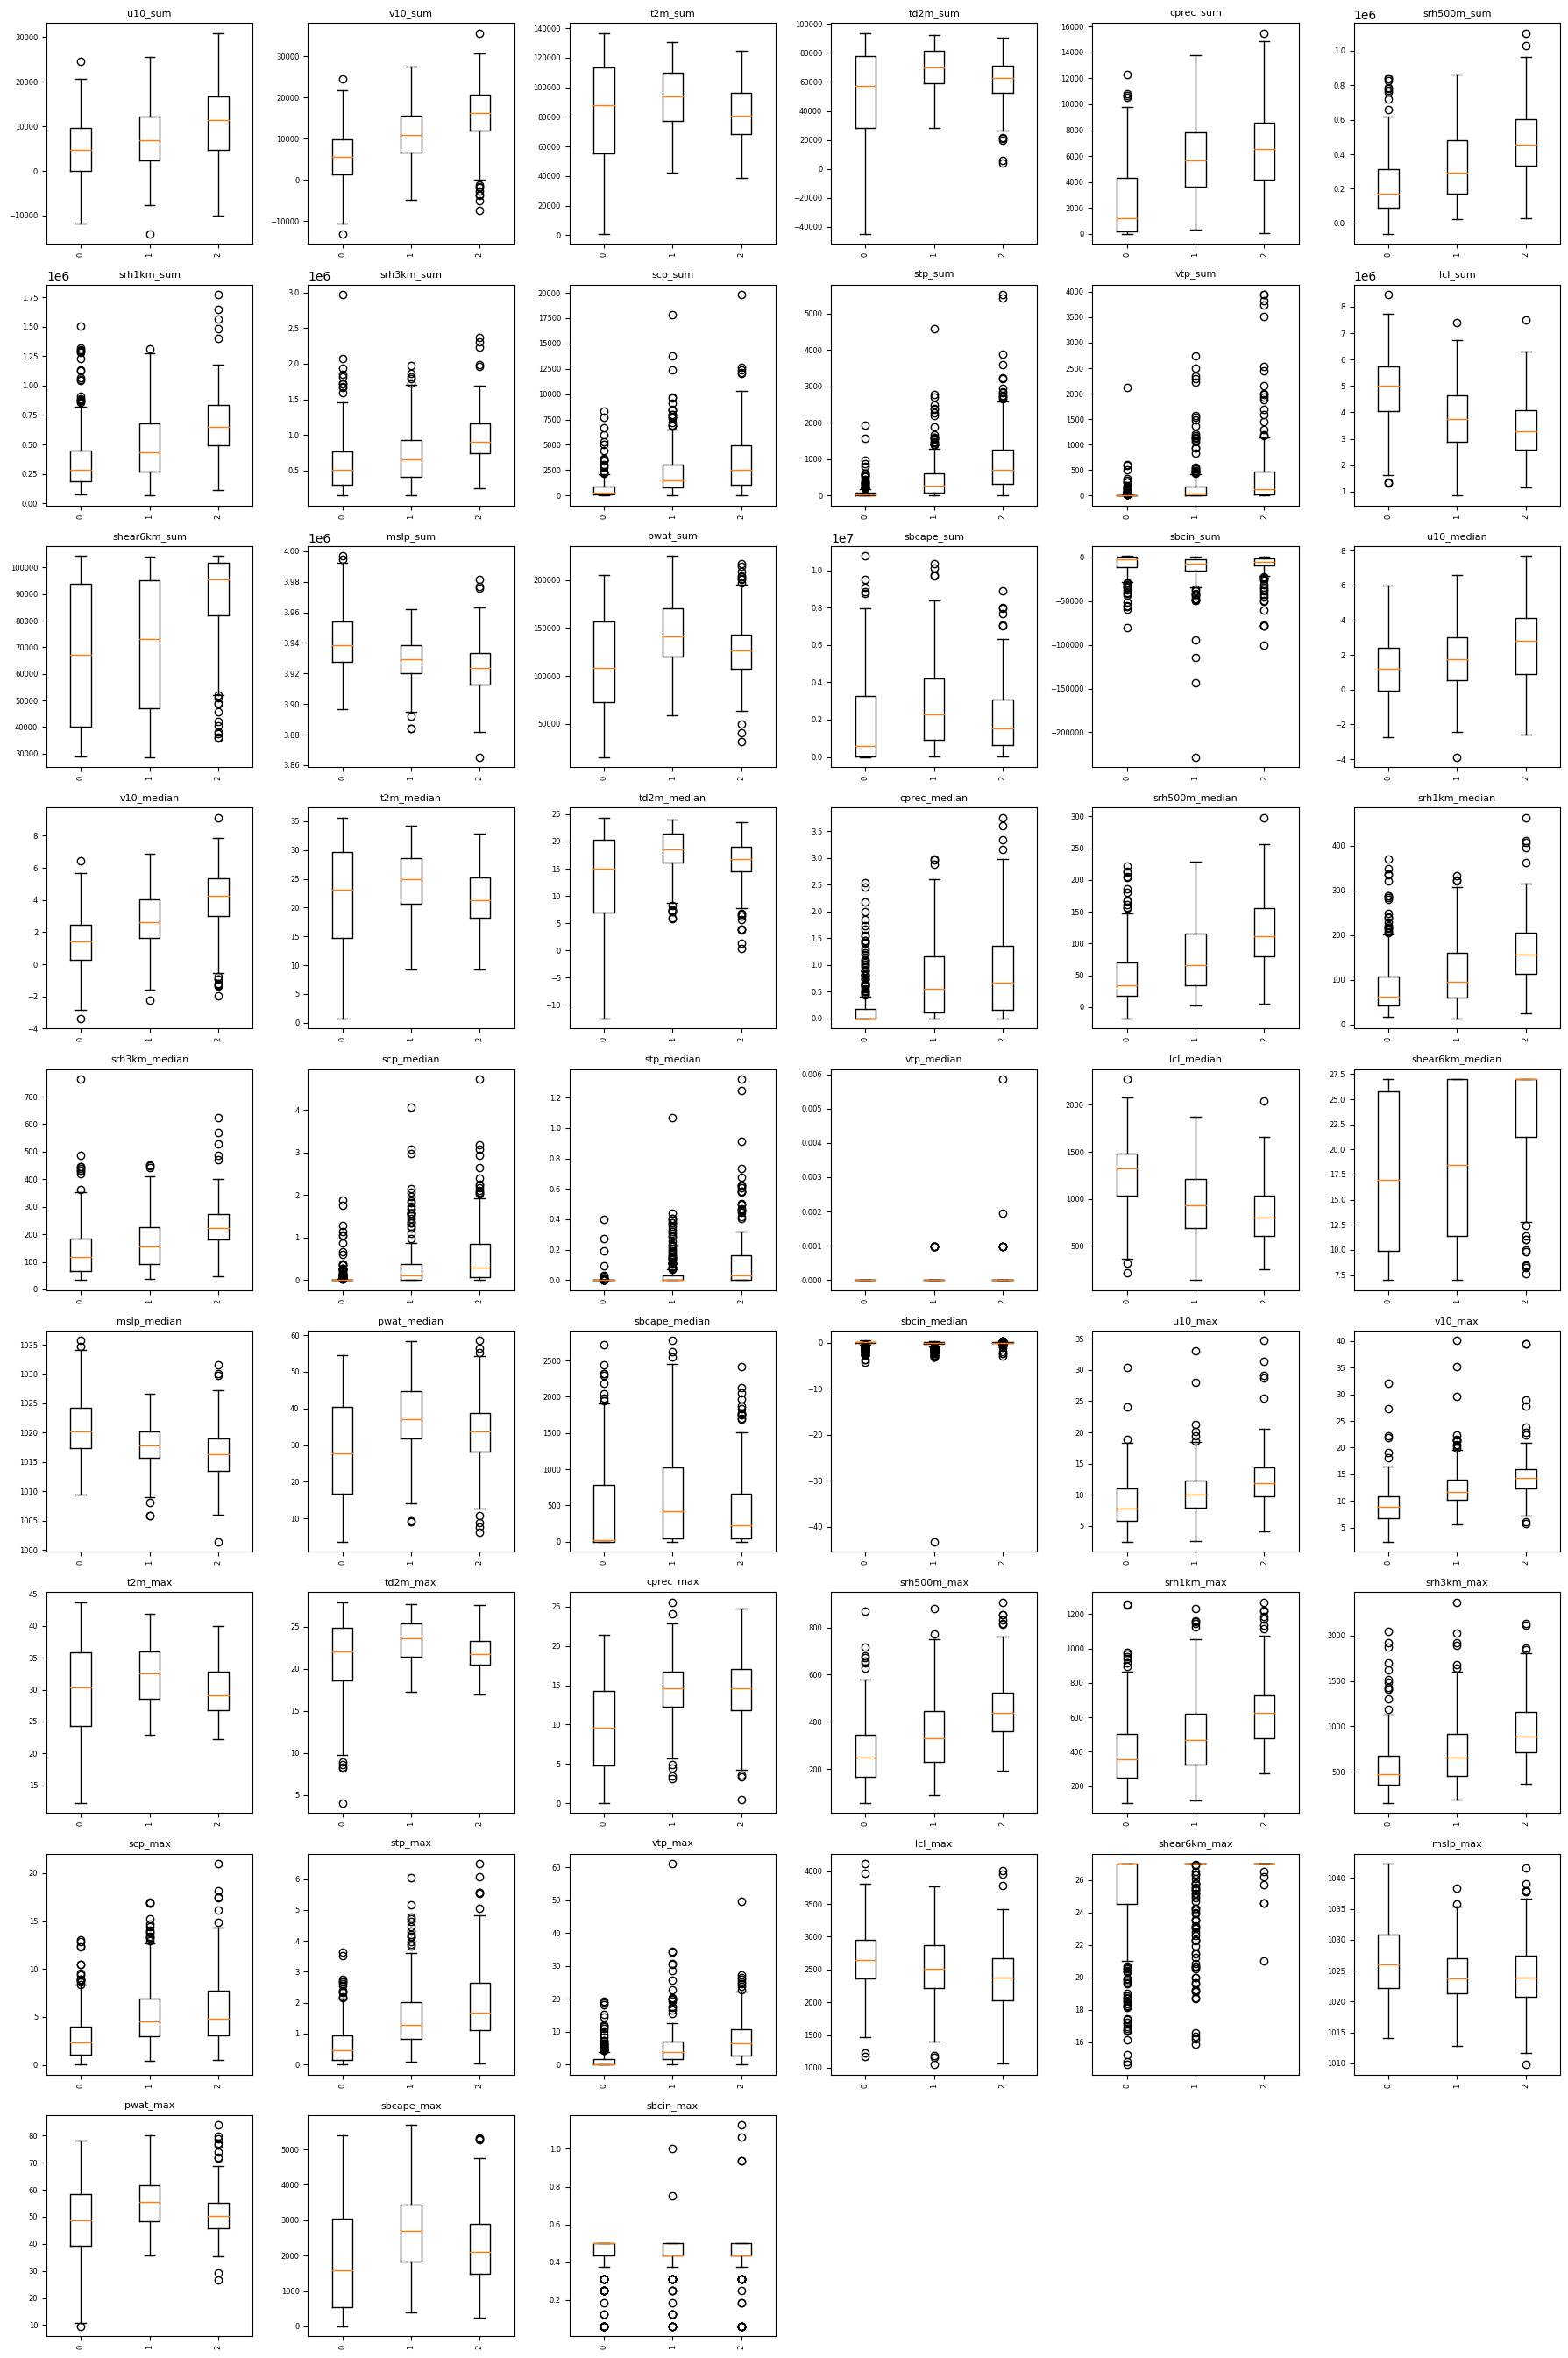

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/home/scratch/BWEART2/tor_RF_event_values_shorts.csv')

# List of features to plot
feature_list = [
    'u10_sum', 'v10_sum', 't2m_sum', 'td2m_sum', 'cprec_sum',
    'srh500m_sum', 'srh1km_sum', 'srh3km_sum', 'scp_sum', 'stp_sum',
    'vtp_sum', 'lcl_sum', 'shear6km_sum', 'mslp_sum', 'pwat_sum',
    'sbcape_sum', 'sbcin_sum', 'u10_median', 'v10_median', 't2m_median',
    'td2m_median', 'cprec_median', 'srh500m_median', 'srh1km_median',
    'srh3km_median', 'scp_median', 'stp_median', 'vtp_median', 'lcl_median',
    'shear6km_median', 'mslp_median', 'pwat_median', 'sbcape_median',
    'sbcin_median', 'u10_max', 'v10_max', 't2m_max',
    'td2m_max', 'cprec_max', 'srh500m_max', 'srh1km_max',
    'srh3km_max', 'scp_max', 'stp_max', 'vtp_max', 'lcl_max',
    'shear6km_max', 'mslp_max', 'pwat_max', 'sbcape_max',
    'sbcin_max'
]

# Unique classification labels
labels = sorted(df['classification'].unique())

# Determine grid size
n = len(feature_list)
n_cols = 6
n_rows = int(np.ceil(n / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3), sharey=False)
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(feature_list):
    ax = axes[i]
    groups = [df[df['classification'] == lbl][feature].dropna() for lbl in labels]
    ax.boxplot(groups, labels=labels)
    ax.set_title(feature, fontsize=8)
    ax.tick_params(axis='x', rotation=90, labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

# Hide any unused subplots
for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig('boxplots.png',dpi=300, bbox_inches='tight')
plt.show()


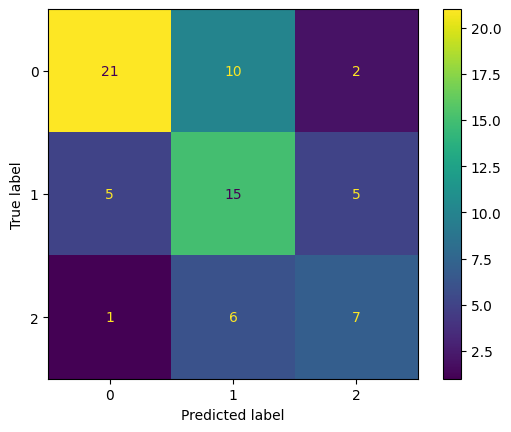

In [28]:
feature_list = ['u10_sum', 'v10_sum', 't2m_sum', 'td2m_sum', 'cprec_sum',
       'srh500m_sum', 'srh1km_sum', 'srh3km_sum', 'scp_sum', 'stp_sum',
       'vtp_sum', 'lcl_sum', 'shear6km_sum', 'mslp_sum', 'pwat_sum',
       'sbcape_sum', 'sbcin_sum', 'u10_median', 'v10_median', 't2m_median',
       'td2m_median', 'cprec_median', 'srh500m_median', 'srh1km_median',
       'srh3km_median', 'scp_median', 'stp_median', 'vtp_median', 'lcl_median',
       'shear6km_median', 'mslp_median', 'pwat_median', 'sbcape_median',
       'sbcin_median',  'u10_max', 'v10_max', 't2m_max',
       'td2m_max', 'cprec_max', 'srh500m_max', 'srh1km_max',
       'srh3km_max', 'scp_max', 'stp_max', 'vtp_max', 'lcl_max',
       'shear6km_max', 'mslp_max', 'pwat_max', 'sbcape_max',
       'sbcin_max']  

train_data = train[feature_list]
val_data = val[feature_list]
test_data = test[feature_list]
               
rf_clf = RandomForestClassifier(n_estimators=64, random_state=1995995 , warm_start = False)

rf_clf.fit(train_data.values, train['classification'].values)

predicted = rf_clf.predict(val_data.values)
expected = val['classification'].values

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(expected, predicted)).plot()
plt.show()

In [29]:
print("Classification report for classifier 1, %s:\n%s\n"
      % (rf_clf, metrics.classification_report(expected, predicted)))

Classification report for classifier 1, RandomForestClassifier(n_estimators=64, random_state=1995995):
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        33
           1       0.48      0.60      0.54        25
           2       0.50      0.50      0.50        14

    accuracy                           0.60        72
   macro avg       0.59      0.58      0.58        72
weighted avg       0.62      0.60      0.60        72




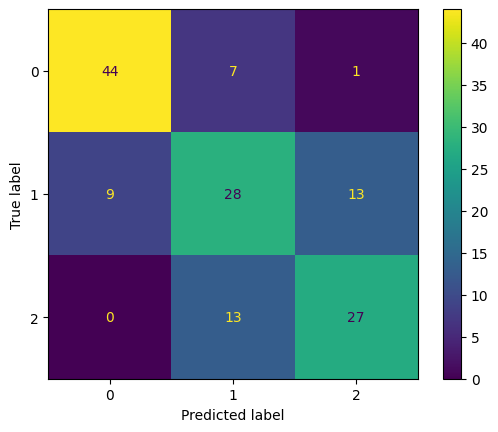

In [30]:
predicted = rf_clf.predict(test_data.values)
expected = test['classification'].values

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(expected, predicted)).plot()
plt.show()

In [31]:
print("Classification report for classifier 1, %s:\n%s\n"
      % (rf_clf, metrics.classification_report(expected, predicted)))

Classification report for classifier 1, RandomForestClassifier(n_estimators=64, random_state=1995995):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        52
           1       0.58      0.56      0.57        50
           2       0.66      0.68      0.67        40

    accuracy                           0.70       142
   macro avg       0.69      0.69      0.69       142
weighted avg       0.69      0.70      0.70       142




In [17]:
importances = rf_clf.feature_importances_

# get sorted list of indices from most to least important
indices = np.argsort(importances)[::-1]

# visit each index in order and print the variable name and importance ratio
for f in range(test[feature_list].values.shape[1]):
    print("%d. (%s) feature %d (%f)" % (f+1, feature_list[indices[f]], indices[f], importances[indices[f]]))

1. (stp_sum) feature 9 (0.048854)
2. (vtp_sum) feature 10 (0.045425)
3. (cprec_sum) feature 4 (0.043379)
4. (scp_sum) feature 8 (0.038636)
5. (v10_max) feature 35 (0.038211)
6. (stp_median) feature 26 (0.031995)
7. (scp_median) feature 25 (0.028743)
8. (vtp_max) feature 44 (0.026882)
9. (srh3km_sum) feature 7 (0.026219)
10. (cprec_median) feature 21 (0.025611)
11. (cprec_max) feature 38 (0.023972)
12. (stp_max) feature 43 (0.022416)
13. (v10_sum) feature 1 (0.022193)
14. (srh3km_median) feature 24 (0.021735)
15. (u10_max) feature 34 (0.021283)
16. (srh500m_max) feature 39 (0.020829)
17. (u10_sum) feature 0 (0.020740)
18. (sbcape_sum) feature 15 (0.020497)
19. (srh1km_max) feature 40 (0.020175)
20. (shear6km_sum) feature 12 (0.020088)
21. (srh500m_sum) feature 5 (0.019213)
22. (scp_max) feature 42 (0.018927)
23. (srh500m_median) feature 22 (0.018913)
24. (pwat_sum) feature 14 (0.017841)
25. (srh1km_sum) feature 6 (0.017421)
26. (srh3km_max) feature 41 (0.016930)
27. (pwat_max) feature 4